In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
import yaml
import logging
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Regressor 

Random Forest Regressor is an algorithm used for regression tasks in machine learning. It is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree in the random forest is trained on a random subset of the training data and uses a random subset of features for splitting. This randomness helps to reduce overfitting and improve the generalization of the model. The final prediction is obtained by averaging the predictions of all the individual trees. Random Forest Regressor is known for its ability to handle complex datasets, handle missing values, and provide feature importance rankings. 


## Most important Hyperparameters

*n_estimators* : 
This hyperparameter determines the number of trees in the forest. More trees can result in better learning performance, but too many can lead to overfitting and longer training times.

*max_depth* :
This hyperparameter sets the maximum depth of the trees. It controls the complexity of the model and helps prevent overfitting. A higher value of max_depth allows the model to capture more complex relationships in the data but can also lead to overfitting if set too high.

*min_samples_split* : 
This hyperparameter determines the minimum number of samples required to split an internal node. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

*min_samples_leaf* : 
This hyperparameter sets the minimum number of samples required to be at a leaf node. Smaller leaf size makes the model more prone to capturing noise in train data.

*max_features* : 
This hyperparameter determines the number of features to consider when looking for the best split. It can take values like 'auto', 'sqrt', 'log2', or an integer representing the number of features.

These hyperparameters play a crucial role in controlling the complexity, generalization, and overfitting of a Random Forest Regressor model. It is important to carefully tune these hyperparameters to achieve the best performance and balance between underfitting and overfitting.


# 1.Load Data
Plus Set Pandas display option to display all columns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/car_prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 1.1 EDA

In [4]:
# Check shape
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# Check for data types
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

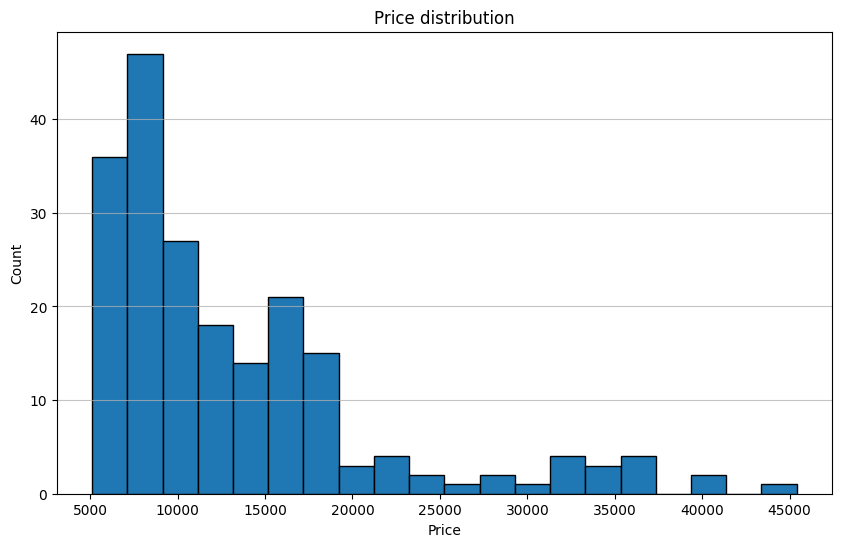

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

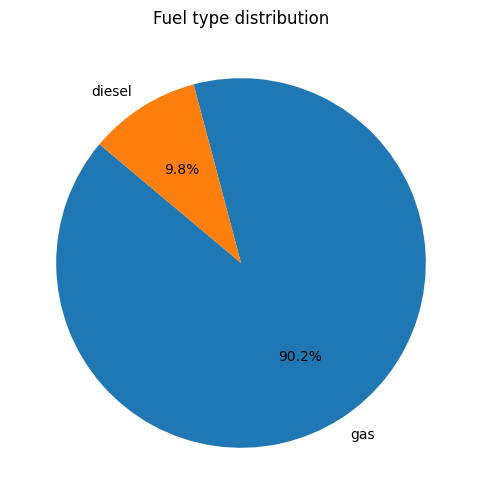

In [15]:
plt.figure(figsize=(10, 6))
plt.pie(df['fueltype'].value_counts(), labels=df['fueltype'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel type distribution')
plt.show()



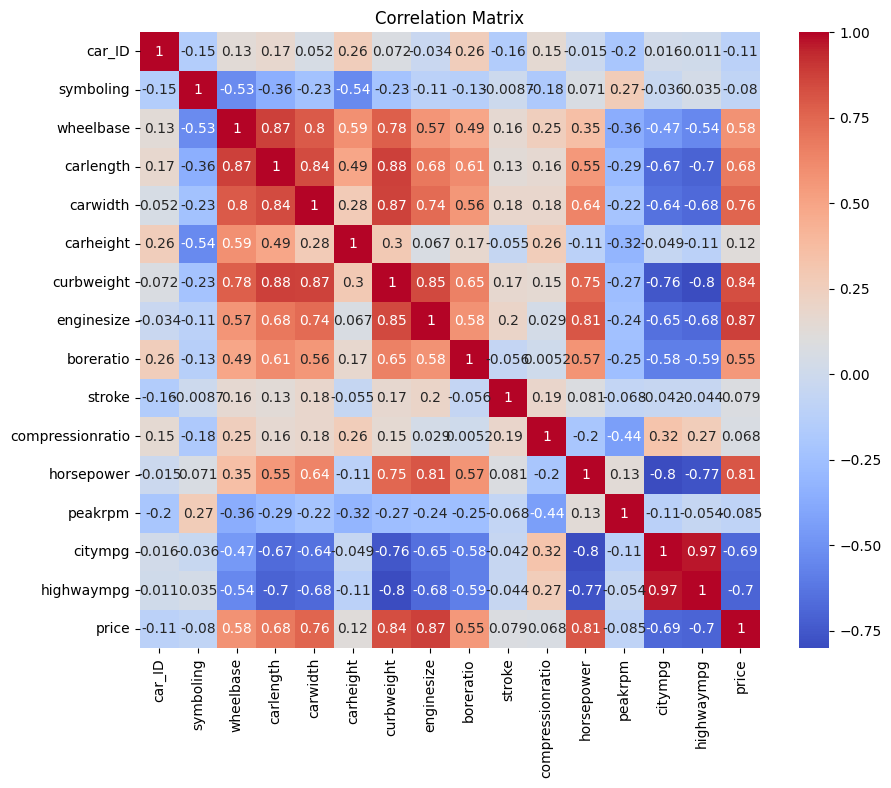

In [16]:
df_num = df.select_dtypes(include=[np.number])
corr_matrix = df_num.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 2. Preprocessing

In [17]:
df_num 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
df_cat = df.select_dtypes(include='object')
df_cat.nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [19]:
df_cat = df_cat.drop(columns=['CarName'])
df_dummies = pd.get_dummies(df_cat, drop_first=True)

In [20]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(df_num)

y_scaler = StandardScaler()
y = y_scaler.fit_transform(df[['price']])

X = pd.DataFrame(X, columns=df_num.columns)
#y = pd.DataFrame(y, columns=['price'])

X = pd.concat([X, df_dummies], axis=1)


In [21]:
X.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [22]:
X.shape, y.shape

((205, 45), (205, 1))

# 3. Model Training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search = random_search.fit(X_train, y_train.ravel())

best_score = random_search.best_score_
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Score: {best_score}")
print(f"Best Params: {random_search.best_params_}")



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.9260247132762656
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


# 4. Make prediction on entire dataset

In [24]:
y_pred = best_model.predict(X)
y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

df_new = df.copy()
df_new['y_pred'] = y_pred_inv

df_new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,y_pred
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,13960.716500
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15716.798583
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,16527.603464
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,13690.261000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17345.785417


## 4.1 Plot Forecasts vs. Actuals

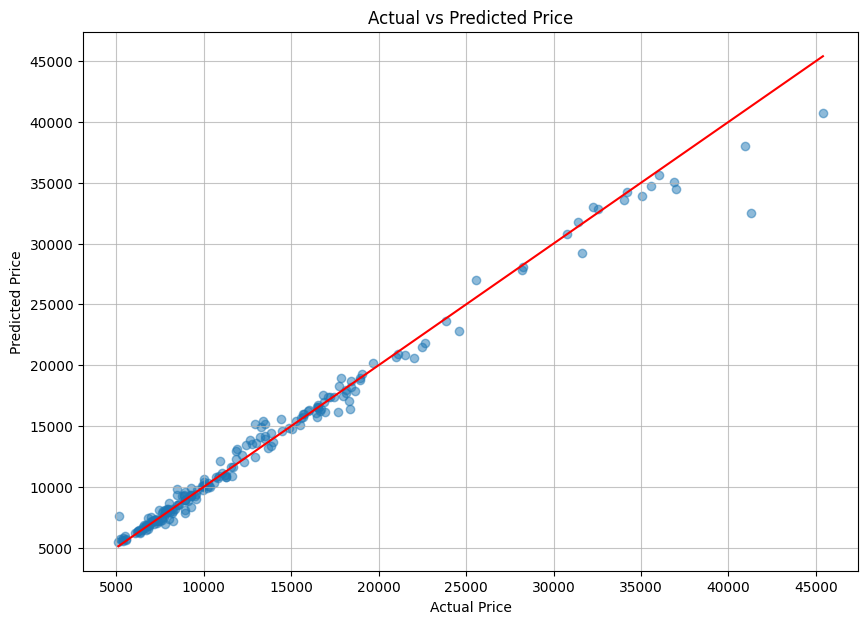

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(df_new['price'], df_new['y_pred'], alpha=0.5)
plt.plot([df_new['price'].min(), df_new['price'].max()], [df_new['price'].min(), df_new['price'].max()], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Actual vs Predicted Price')
plt.show()

## 4.2 Residual Plot 

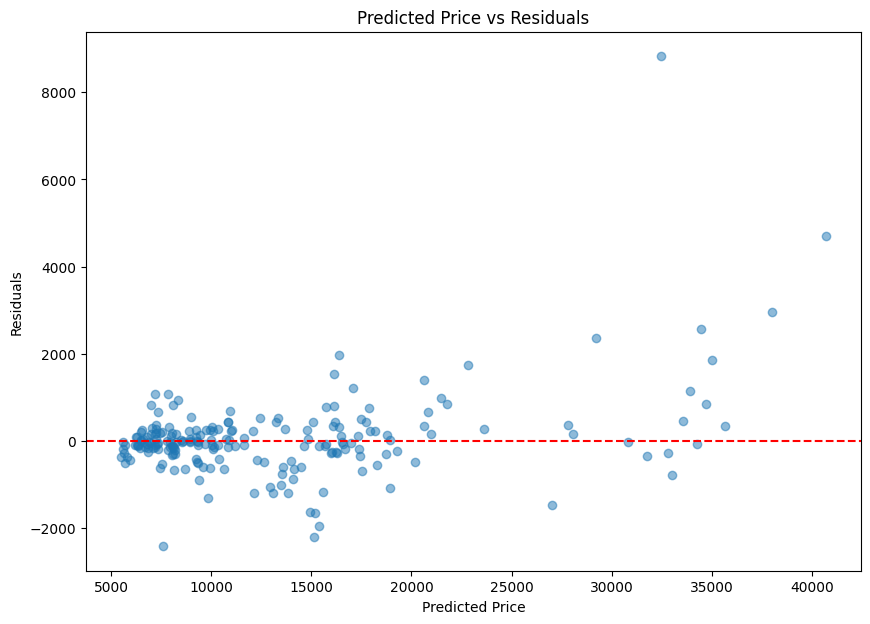

In [30]:
df_new['residuals'] = df_new['price'] - df_new['y_pred']

plt.figure(figsize=(10, 7))
plt.scatter(df_new['y_pred'], df_new['residuals'], alpha=0.5)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Predicted Price vs Residuals')
plt.show()

# 5. Feature Importance 

In [31]:
feature_importances = best_model.feature_importances_
features = X.columns
df_fi = pd.DataFrame({'features': features, 'importance': feature_importances})
df_fi = df_fi.sort_values(by='importance', ascending=False)
df_fi.head(10)

,features,importance
15,price,0.160361
7,enginesize,0.153301
6,curbweight,0.106283
13,citympg,0.081241
14,highwaympg,0.073419
3,carlength,0.064246
33,cylindernumber_four,0.055616
4,carwidth,0.055541
11,horsepower,0.053294
8,boreratio,0.027712


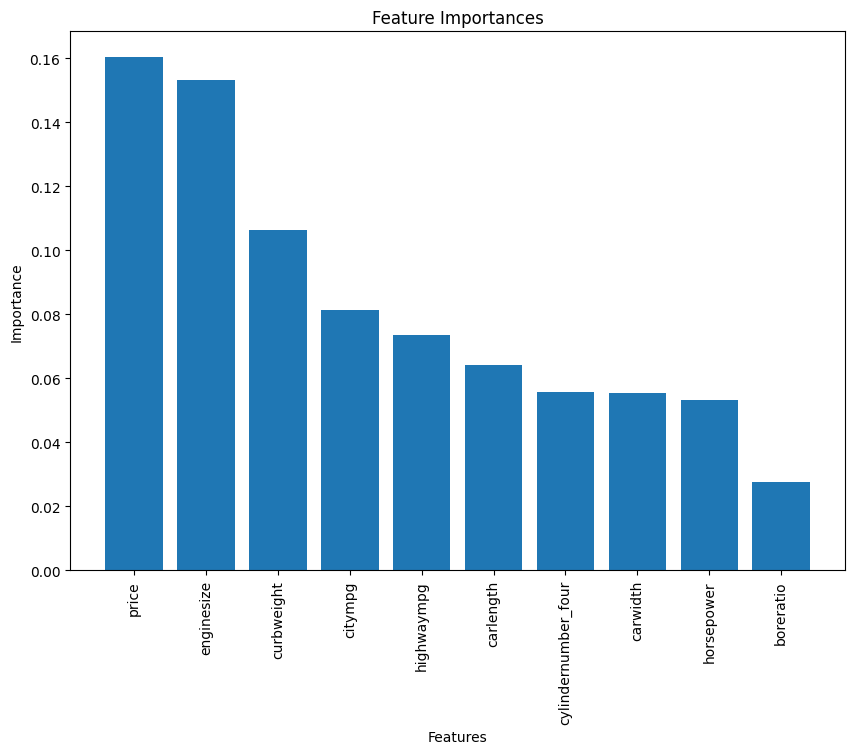

In [32]:
plt.figure(figsize=(10, 7))
plt.bar(df_fi['features'].head(10), df_fi['importance'].head(10))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)  
plt.show()